# Generate Step Distribution

Generate step (displacement) distribution of an ensemble of trajecetories and corresponding descriptions as single and two Gaussians (e.g. Ly et al. Figure 3).

In [1]:
#uses mixtools to generate the mixture model
options(jupyter.plot_scale=1)
library(mixtools)

mixtools package, version 2.0.0, Released 2022-12-04
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772 and the Chan Zuckerberg Initiative: Essential Open Source Software for Science (Grant No. 2020-255193).




Load step data and class labels. Select mobile trajectories.

In [2]:
#load class/treatment data frame
df<-readRDS('../generate_ImmobileMobile/mbcd-untreated-exampleDF.rds')

In [3]:
#load steps file for the untreated MEFs
stepe<-readRDS('../examples/untreated/untreated-StepsNormalized-200.rds')

In [4]:
#select mobile trajectories and store steps as a vector
rns<-rownames(df[df$class=="mobile",])
    stepMobU<-sapply(stepe[rns],as.vector)
    stepMobU<-na.omit(unlist(stepMobU))

Generate histogram

In [5]:
#bin width
bw=2*IQR(stepMobU)*length(stepMobU)^(-1/3)
#number of bins
nbins<-ceiling(diff(range(stepMobU))/bw)
h<-hist(stepMobU,breaks = nbins/4,plot=F)

Generate models

In [6]:
#mean and sd
mu<-mean(stepMobU)
sigma<-sd(stepMobU)
#choose suitable min/max values
f<-ecdf(stepMobU)
f(-8)
1-f(8)

[1] 0

[1] 8.179812e-07

In [7]:
#single-Gaussian
x <- seq(-8, 8, length=100)
y1 <-dnorm(x, mean=mu , sd=sigma)

In [8]:
#two-Gaussian
set.seed(10)
m2<-normalmixEM(stepMobU,k=2,epsilon = 1e-4,fast = TRUE)
summary(m2)

number of iterations= 406 
summary of normalmixEM object:
            comp 1      comp 2
lambda 3.12093e-01 0.687907226
mu     4.77767e-05 0.000295477
sigma  1.45558e+00 0.701757632
loglik at estimate:  -1697231 


In [9]:
y2<-dnorm(x,mean=m2$mu[1],sd=m2$sigma[1])*m2$lambda[1]+dnorm(x,mean=m2$mu[2],sd=m2$sigma[2])*m2$lambda[2]

Plot everything as in Ly et al. Figure 3

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“21 y values <= 0 omitted from logarithmic plot”


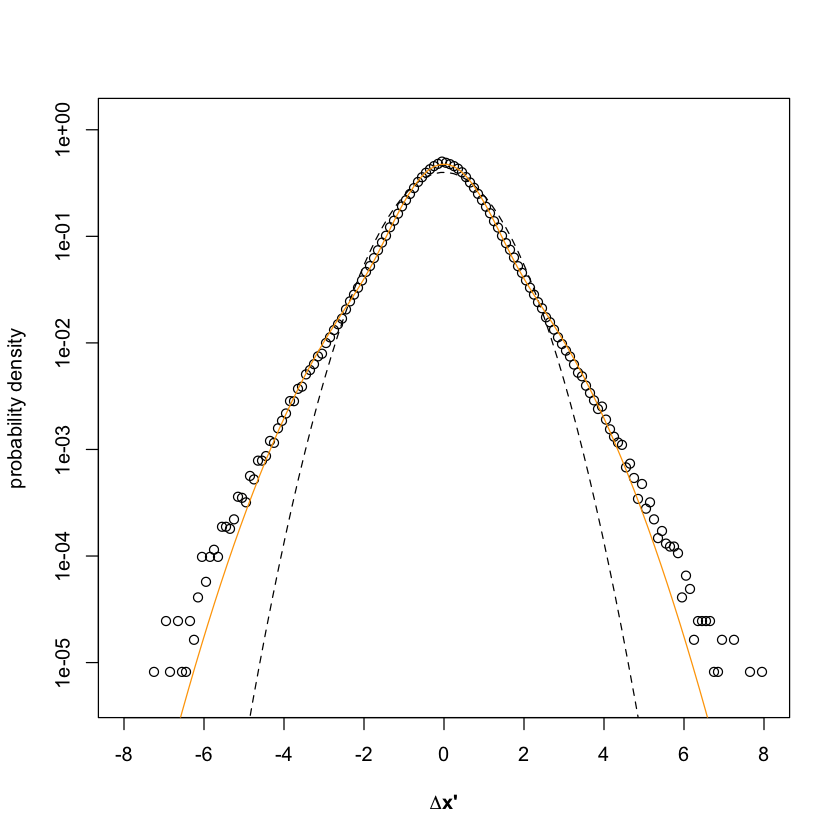

In [10]:
plot(x=h$mids,y=h$density,log='y',ylim=c(5e-6,1.2),xlim=c(-8,8),xaxp = c(-8, 8, 8),
     xlab=expression(bold(paste(Delta,"x'" ))),ylab='probability density')
lines(x,y1,lty = 2)
lines(x,y2,col='orange')